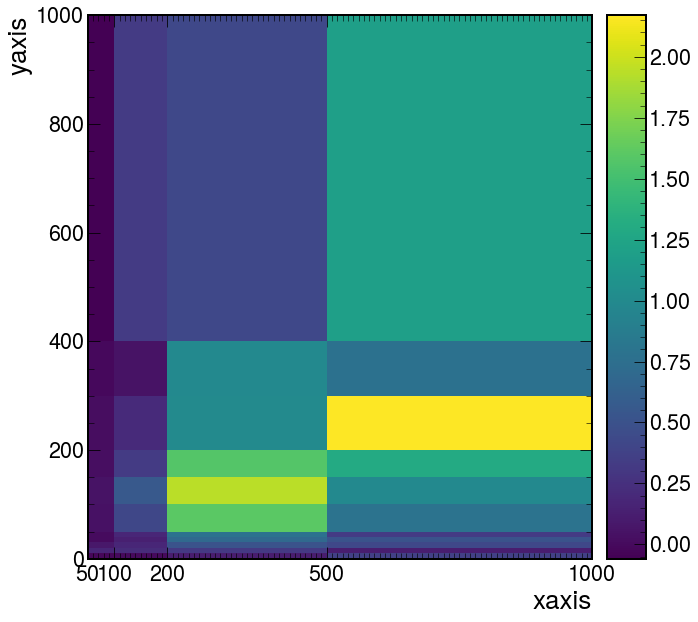

In [127]:
from coffea.util import save, load
from coffea import hist
import numpy as np
histo = load("../results/2017/DYreweight/output.coffea")[0]['mass_pt']

list_of_bkg = ['DYJetsToLL_M-50']
list_of_DY = ['DYJetsToLL_M-50']

data = histo.integrate('dataset', 'data').to_hist()
bkg = histo.integrate('dataset', list_of_bkg).to_hist()

DY_in_MC = histo.integrate('dataset', list_of_DY).to_hist()
DY_in_data = data + bkg*-1

import uproot3
fout = uproot3.recreate('output.root')
SF = (DY_in_data.values()/DY_in_MC.values(), DY_in_data.to_numpy()[1], DY_in_data.to_numpy()[2])
fout['Zptm'] =  SF
fout.close()

import uproot
fout = uproot.open('output.root')
fout['Zptm'].to_hist().plot()
fout.close()


/afs/hep.wisc.edu/home/kaho/miniconda3/envs/coffeaenv_conda/lib/python3.9/site-packages/coffea/hist/hist_tools.py:376: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7f327395dfa0>
  warnings.warn(
/afs/hep.wisc.edu/home/kaho/miniconda3/envs/coffeaenv_conda/lib/python3.9/site-packages/coffea/hist/hist_tools.py:376: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7f327395dfa0>
  warnings.warn(


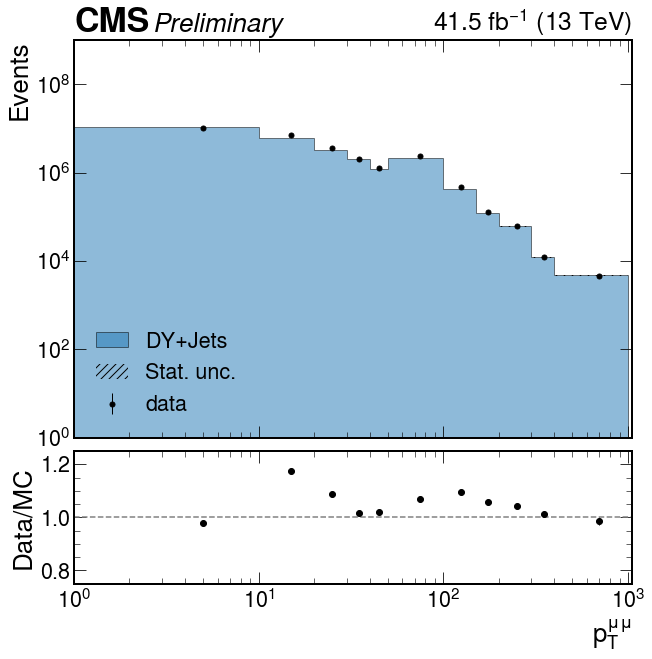

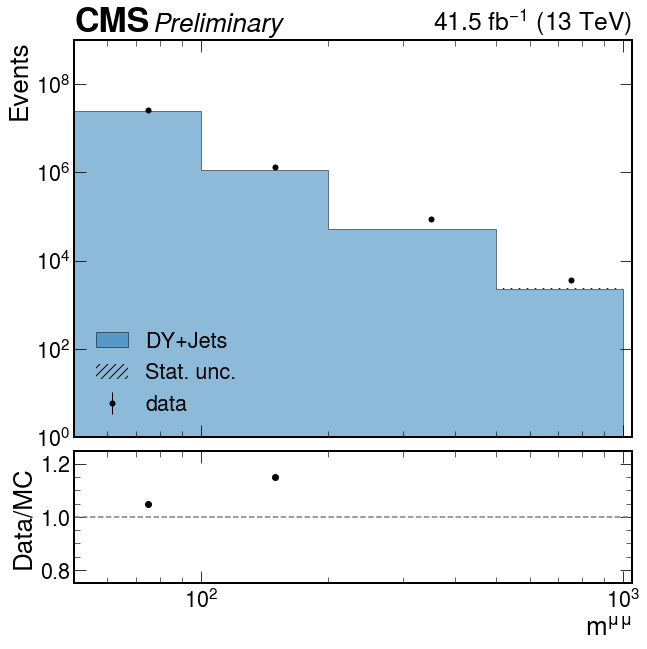

In [133]:
from coffea.util import save, load
from coffea import hist
histo = load("../results/2017/DYreweight/output.coffea")[0]['mass_pt']

list_of_bkg = ['TTTo2L2Nu', 'DYJetsToLL_M-50']

label_dict = {
    'data': 'data',
    'TTTo2L2Nu': r'$t\bar{t}$',
    'DYJetsToLL_M-50': r'DY+Jets',
    "Stat. unc.": "Stat. unc."
}
vars_ = ['mmmass', 'mmpt']
x_labels = [r"$p_{T}^{\mu\mu}$", r"$m^{\mu\mu}$"]

%matplotlib inline
for var_,x_label_ in zip(vars_,x_labels):
    data = histo.integrate(var_)[['data'], :].to_hist()
    bkg = histo.integrate(var_)[list_of_bkg, :].to_hist()

    import matplotlib.pyplot as plt
    import mplhep
    plt.style.use(mplhep.style.CMS)

    # define a ratio plot figure
    fig, (ax, rax) = plt.subplots(2, 1, gridspec_kw=dict(height_ratios=[3, 1], hspace=0.05), sharex=True)
    #fig, ax = plt.subplots()

    # from cycler import cycler
    # colors = ['#1f78b4','#33a02c','#e31a1c']
    # ax.set_prop_cycle(cycler(color=colors))

    bkg.plot1d(
        ax=ax,
        overlay="dataset",
        histtype="fill",
        stack=True,
        alpha=0.5,
        edgecolor=(0, 0, 0, 0.3),
        #label=[r'$t\bar{t}$','data']
    )


    data.plot1d(ax=ax, histtype="errorbar", color="k")

    ax.set_xlabel("")
    ax.set_ylabel("Events")
    ax.set_ylim(bottom=0)
    ax.set_ylim(1, 10**9)
    ax.set_yscale('log')
    if var_=='mmmass':
        ax.set_xlim(1, None)
    else:
        ax.set_xlim(50, None)
    ax.set_xscale('log')

    import numpy as np

    total_bkg = bkg[::sum, :].to_numpy()[0]

    # create a total statistical uncertainty hatch
    ax.stairs(
        edges=bkg.axes[1].edges,
        baseline=total_bkg - np.sqrt(total_bkg),
        values=total_bkg + np.sqrt(total_bkg),
        hatch="///",
        label="Stat. unc.",
        facecolor="none",
        linewidth=0,
        color="black",
    )

    legend = ax.legend()

    label_list = []
    for t in ax.get_legend_handles_labels():
        label_list.append(t)

    new_label_list = []
    for txt in label_list[1]:
        if txt[0] == '0':
            txt = str(txt)[:4]
        new_label_list.append(label_dict[txt])
    label_list[1] = new_label_list

    ax.legend(handles=label_list[0], labels=label_list[1])


    total_bkg_view = bkg[::sum, :].to_numpy()[0]
    data_view = data[::sum, :].to_numpy()[0]
    # now draw a ratio plot
    from hist.intervals import ratio_uncertainty

    rax.errorbar(
        x=data.axes[1].centers,
        y=data_view/total_bkg_view,
        yerr=ratio_uncertainty(data_view, total_bkg_view, "poisson"),
        color="k",
        linestyle="none",
        marker="o",
        elinewidth=1,
    )
    rax.axhline(y=1.0, linestyle="dashed", color="gray")
    rax.set_ylabel("Data/MC", loc="center")
    rax.set_ylim(0.75, 1.25)
    rax.set_xlabel(x_label_)

    # add some labels
    lumi = mplhep.cms.label(ax=ax, lumi=41.5, label="Preliminary", data=1)

